In [6]:
import geopandas as gpd
from bs4 import BeautifulSoup

In [2]:
fp = "geodata/TR_2011_LAU1.shp"
data = gpd.read_file(fp)

In [3]:
data.head()

,ID,ADI,PLAKANO,ILADI,SHAPE_AREA,SHAPE_LEN,PROVINCE,DISTRICT,YEAR,Province_c,Province_d,District_c,ICC,ICC_LAU_CO,geometry
0,1001,Ayranci,70001,Karaman,0.254221,2.228821,Karaman,Ayranci,2012.0,70.0,1.0,70001.0,TR,TR70001,"POLYGON ((33.53965 37.51372, 33.57426 37.52156..."
1,1002,Kazimkarabekir,70004,Karaman,0.039454,0.810740,Karaman,Kazimkarabekir,2012.0,70.0,4.0,70004.0,TR,TR70004,"POLYGON ((32.79166 37.20782, 32.79368 37.21152..."
2,1003,Sariveliler,70005,Karaman,0.040938,0.853364,Karaman,Sariveliler,2012.0,70.0,5.0,70005.0,TR,TR70005,"POLYGON ((32.46505 36.70084, 32.48402 36.70961..."
3,1004,Basyayla,70002,Karaman,0.024696,0.787231,Karaman,Basyayla,2012.0,70.0,2.0,70002.0,TR,TR70002,"POLYGON ((32.73792 36.82018, 32.73559 36.81552..."
4,1005,Ermenek,70003,Karaman,0.120141,1.680104,Karaman,Ermenek,2012.0,70.0,3.0,70003.0,TR,TR70003,"POLYGON ((32.67259 36.51665, 32.67722 36.51989..."


<AxesSubplot:>

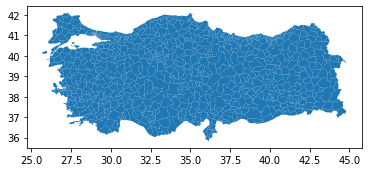

In [4]:
data.plot()

In [7]:
def process_to_svg_group(row):
    rd = row.to_dict()
    del rd["geometry"]
    
    to_add = []
    for key, val in rd.items():
        to_add.append('data-{}="{}"'.format(key, val))

    ps = BeautifulSoup(row.geometry._repr_svg_(), "xml").find_all("path")
    paths = []
    for p in ps:
        new_path = f"""
<g {' '.join(to_add)}>
{str(p)}
</g>
"""
        paths.append(new_path)

    return "\n\n".join(paths)


processed_rows = []
for i, row in data.sample(frac=1).iterrows():
    p = process_to_svg_group(row)
    processed_rows.append(p)

In [9]:
import textwrap

props = {
    "viewBox": f"{data.total_bounds[0]} {data.total_bounds[1]} {data.total_bounds[2] - data.total_bounds[0]} {data.total_bounds[3] -data.total_bounds[1] }",
    "xmlns": "http://www.w3.org/2000/svg",
    "xmlns:xlink": "http://www.w3.org/1999/xlink",
    "transform": "scale(1, -1)",
    "preserveAspectRatio":"XMinYMin meet"
}


template = '{key:s}="{val:s}"'
attrs = " ".join([template.format(key=key, val=props[key]) for key in props])

raw_svg_str = (
    textwrap.dedent(
        r"""
    <?xml version="1.0" encoding="utf-8" ?>
    <svg {attrs:s}>
    {data:s}
    </svg>
"""
    )
    .format(attrs=attrs, data="".join(processed_rows))
    .strip()
)

with open("turkey_districts_map.svg", "w") as f:
    f.write(raw_svg_str)